# Regresión logística (0 hidden layers neural network)

Construimos el primer modelo basado en redes neuronales para la predicción del cancer. ¿Mejoramos la precisión de un simple modelo de ML de clasificación?

In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
ruta_fichero = "/content/breast-cancer.csv"
df = pd.read_csv(ruta_fichero, )
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [9]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
x = df.drop("is_cancer", axis=1)
y = df.is_cancer

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=17)

In [13]:
# Realizamos nustro modelo de regres. logística
from sklearn.linear_model import LogisticRegression
# Creamos nuestro estimador
log = LogisticRegression(max_iter=10000)
# creamos nuestro ajuste
log.fit(X_train, y_train)

# Extraemos el score
log.score(X_test, y_test)

0.9473684210526315

In [14]:
# Extraemos los coeficientes del modelo
pd.Series(log.coef_[0], index=x.columns).sort_values().tail()

worst_texture           0.513143
worst_concave_points    0.528490
worst_compactness       0.535565
worst_symmetry          0.583031
worst_concavity         1.287672
dtype: float64

In [15]:
log.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0])

# Multilayer Perceptron ( 1 + hidden layer neural network)

- Tensorflow
- keras

In [16]:
# tensorflow low level library
# keras high level library
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

In [17]:
# Creamos red neuronal
network = models.Sequential()

In [19]:
df.shape

(569, 31)

In [21]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'is_cancer'],
      dtype='object')

- Construimos el core de una red neuronal, con **layer** y diferentes nodos.

* --- capa input  (**input layer**) - La dimension será igual al número de las features 30)
* --- capa oculta (**hidden layer**) - n nodos < capa input ?¿ 10 - donde tengo la función de activación -- ajuste del peso ... parámetros

* --- capa salida (**output layer**) - 1 dimensión, salida binaria


In [22]:
network.layers

[]

In [23]:
X_train.shape

(455, 30)

In [26]:
# Añadimos las capas ocultas
network.add(layers.Dense(10, activation='relu', input_shape=(30,)))

# Añadimos la capa de salida
network.add(layers.Dense(1, activation='sigmoid'))

# Resumen
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


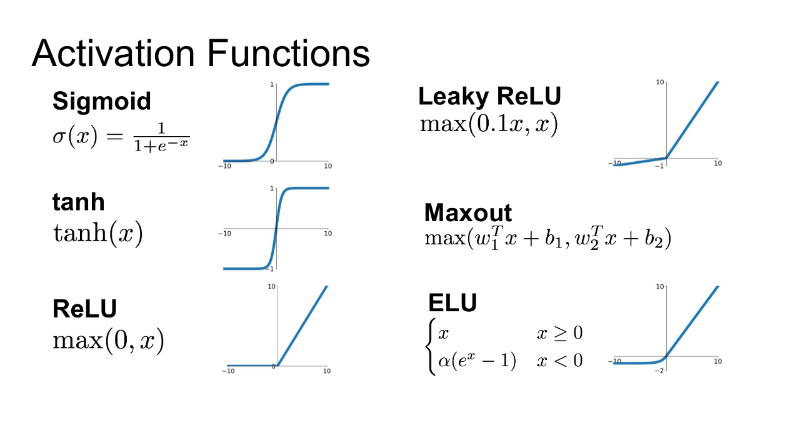

# Compilamos una red neuronal con parámetros:

* **Loss function** - función de pérdida
* **Optimizer** - optimizador
* **Metrics** - métrica de validación del modelo

In [28]:
# aplicamos los parámetros a nuestra red
network.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# Training

una red neuronal será entrenada por época **epochs** en cada step
* realiza una predicción y ajusta el peso *weights* - forward propagation
* realiza la comparativa con el predicho y el real
* aplica los cambios al weight y sigue adelante - back propagation

In [42]:
# aplicamos a nuestro modelo de red neuronales los parámetros de entreno
history = network.fit(
    X_train, y_train.astype(float),
    epochs=1000,
    verbose=1,
    validation_split=0.10 # aplica un porcentaje de validación sobre los datos de entreno
)

Epoch 1/1000
13/13 [==============================] - 0s 15ms/step - loss: 0.0592 - accuracy: 0.9731 - val_loss: 0.1474 - val_accuracy: 0.9348
Epoch 2/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0886 - accuracy: 0.9633 - val_loss: 0.1485 - val_accuracy: 0.9348
Epoch 3/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0862 - accuracy: 0.9707 - val_loss: 0.1545 - val_accuracy: 0.9348
Epoch 4/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0632 - accuracy: 0.9707 - val_loss: 0.1344 - val_accuracy: 0.9565
Epoch 5/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0672 - accuracy: 0.9707 - val_loss: 0.1303 - val_accuracy: 0.9348
Epoch 6/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0588 - accuracy: 0.9731 - val_loss: 0.1288 - val_accuracy: 0.9348
Epoch 7/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0603 - accuracy: 0.9682 - val_loss: 0.1288 - val_accuracy: 0.9348
Epoc

In [40]:
network.predict(X_test)[:20].round(1)

4/4 [==============================] - 0s 3ms/step


array([[0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [1. ],
       [0.1],
       [1. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [1. ],
       [0.7],
       [0. ],
       [1. ],
       [0. ],
       [0. ]], dtype=float32)

In [39]:
y_test[:20]

355    0
411    0
188    0
357    0
173    0
529    0
473    0
499    1
204    0
105    1
71     0
109    0
495    0
397    0
54     1
238    0
227    0
180    1
528    0
350    0
Name: is_cancer, dtype: int64

In [41]:
# aplicamos la métrica
from sklearn.metrics import accuracy_score
print(f"La precisión de nuestro modelo NN es del {round(accuracy_score(network.predict(X_test) > 0.5, y_test) *100,3)}%")

4/4 [==============================] - 0s 2ms/step
La precisión de nuestro modelo NN es del 93.86%


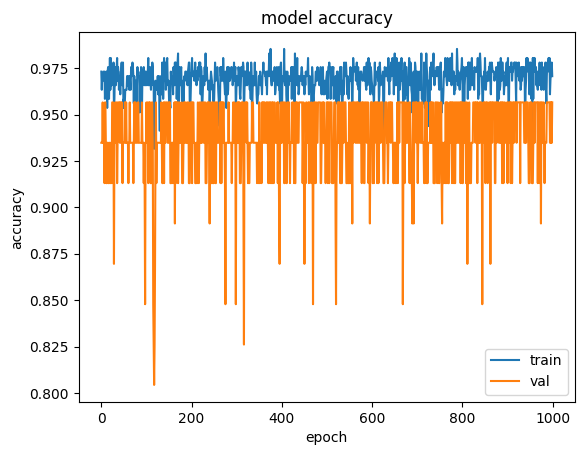

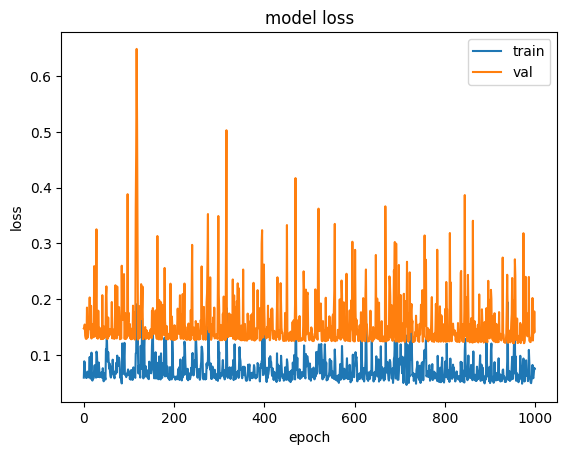

In [44]:
# visualise accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# visualise loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [43]:
from matplotlib import pyplot
from mlxtend.plotting import plot_decision_regions

4/4 [==============================] - 0s 11ms/step - loss: 0.2115 - accuracy: 0.9386
Test results - Loss: 0.2114911824464798 - Accuracy: 93.85964870452881%


ValueError: ignored

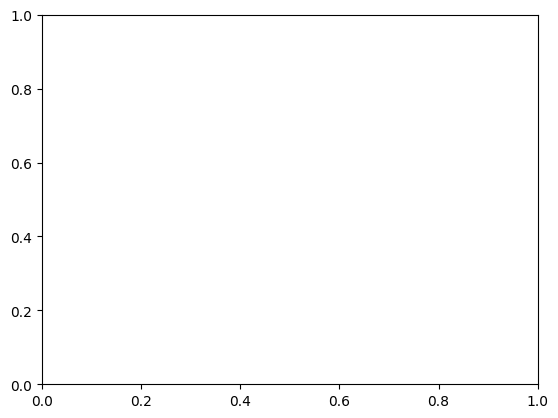

In [49]:
# evaluate the model
test_results = network.evaluate(np.array(X_test), np.array(y_test), verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

# visualise the decision boundary
plot_decision_regions(np.array(X_test), np.array(y_test), clf=network, legend=2)
plt.show()